In [1]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

In [2]:
%%html
<!-- <style>
  table {display: inline-block}
</style> -->

# שבוע 8 - Matplotlib, Probabilities & Histograms


## חלק א' — Matplotlib 
זוהי ספרייה פופולרית להצגת גרפים וויזואליזציות בפייתון.  
היא מאפשרת ליצור תרשימים דו־ממדיים כמו גרפים קוויים, עמודות, פיזור (scatter), תרשימי חום (heatmaps) ועוד.  
עבור פיזיקאים ומתמטיקאים, היא כלי חיוני להצגת נתונים, תוצאות ניסוי וסימולציות בצורה ברורה.  
המודול הנפוץ ביותר לשימוש הוא `matplotlib.pyplot` שמספק פקודות פשוטות לשרטוט מהיר.

## אנטומיית תרשימים
**מושגים מרכזיים:**  
- **Figure** — מכלול התרשים (הדף).  
- **Axes** — מערכת צירים אחת (או יותר) בתוך ה־Figure.  
- **Axis** — ציר $x$ או $y$ בתוך ה־Axes.

יש שתי דרכים עיקריות לעבוד:  
1. **סגנון Pyplot** (מהיר): `(...)plt.plot`, ואז `()plt.show`  
2. **מודל אובייקטי (מומלץ לפרויקטים)**: יצירת `()fig, ax = plt.subplots` ואז שימוש ב־`(...)ax.plot` וכן הלאה.

נוסיף כותרות, תוויות, ונטמיע נוסחאות עם $ \LaTeX $ בכותרת/צירים. ראשית, נייבא את הספרייה ונאתחל פרמטרים

In [3]:
# Core imports used across the notebook
import numpy as np
import matplotlib.pyplot as plt

# Global plotting defaults (feel free to tweak)
plt.rcParams.update({
    "figure.figsize": (7, 4.5),
    "figure.dpi": 120,
    "axes.grid": True,
    "font.size": 11
})


### שימוש במודל האובייקטי של matplotlib

בדוגמה זו נשתמש בשיטה האובייקטית של matplotlib ליצירת גרף פשוט:  
- נבנה מערך ערכים $x$ בתחום $[0, 2\pi]$.  
- נחשב את $y = \sin(x)$.  
- נשרטט את הגרף של פונקציית הסינוס עם כותרת, שמות לצירים ו־Legend.

```{note}
השיטה האובייקטית, `()fig, ax = plt.subplots` מאפשרת שליטה נוחה על כל מרכיבי התרשים, ולכן מומלצת לשימוש בפרויקטים מסודרים.
```

### דוגמה: גרף פשוט של הפונקציה $\sin(x)$:

1. **יצירת נתונים**  
   - `x = np.linspace(0, 2*np.pi, 200)` יוצר 200 נקודות מ־0 עד $2\pi$ (רדיונים).  
   - `y = np.sin(x)` מחשב את ערכי הסינוס עבור כל נקודה.

2. **הגדרת תרשים**  
   - `()fig, ax = plt.subplots` יוצר פיגורה (`fig`) וציר (`ax`) לעבודה.

3. **ציור הגרף**  
   - `ax.plot(x, y, label="sin(x)")` מצייר את $y=\sin(x)$ עם תווית למקרא.

4. **כותרות ותוויות**  
   - `ax.set_title(r"$y=\sin(x)$")` מוסיף כותרת עם נוסחת LaTeX.  
   - `ax.set_xlabel(r"$x$ (rad)")` ו־`ax.set_ylabel(r"$y$")` מוסיפים שמות לצירים, כולל יחידות ברדיאנים.

5. **מקרא**  
   - `()ax.legend` מציג את המקרא עם התווית שהוגדרה.

6. **פריסה ותצוגה**  
   - `()plt.tight_layout` דואג שאין חפיפות בין רכיבי התרשים.  
   - `()plt.show` מציג את התרשים על המסך.

בקצרה: הקוד מייצר תרשים של הפונקציה $\sin(x)$ בין $0$ ל־$2\pi$, עם כותרות, יחידות ומקרא.


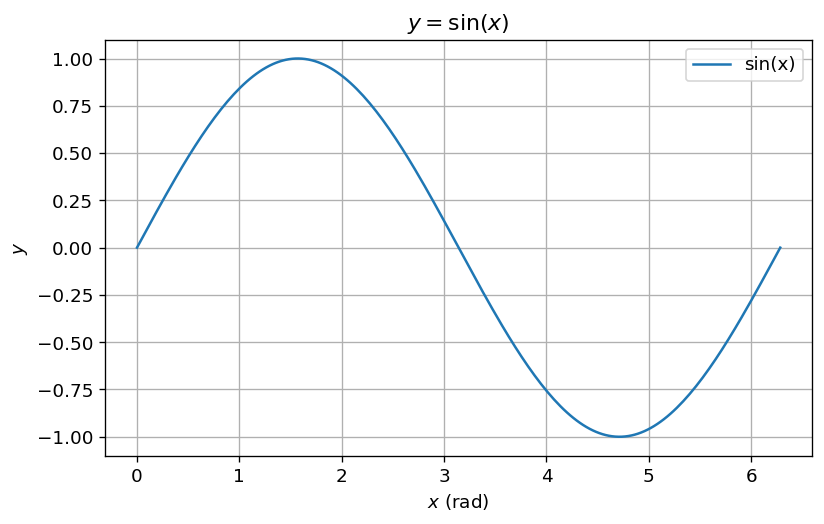

In [4]:
x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, label="sin(x)")
ax.set_title(r"$y=\sin(x)$")
ax.set_xlabel(r"$x$ (rad)")
ax.set_ylabel(r"$y$")
ax.legend()
plt.tight_layout()
plt.show()

### גודל תרשים, DPI, פריסה ושמירה

בתרשים זה נמחיש כיצד לשלוט בפרמטרים חשובים של Figure:  
- `figsize` — קובע את גודל התרשים באינצ'ים.  
- `dpi` — רזולוציית התצוגה (נקודות לאינץ').  
- `constrained_layout=True` — מאפשר התאמה אוטומטית של פריסת האלמנטים (כותרות, תוויות) כך שלא ייחתכו.  
- `(...)fig.savefig` — שמירת התרשים כקובץ (למשל PDF איכותי להדפסה, או PNG למסך).

בדוגמה נצייר את פונקציית הקוסינוס, נוסיף כותרת, שמות לצירים ו־Legend, ונראה כיצד ניתן לשמור את הגרף באיכות המתאימה לפרסום.


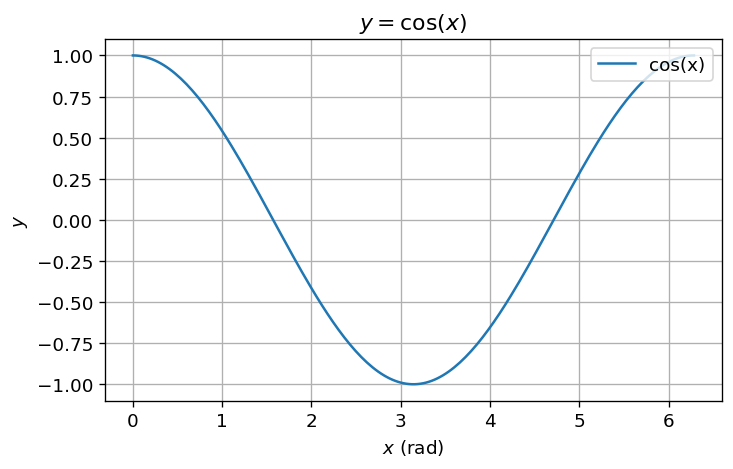

In [5]:
# Figure size, dpi, layout, and saving
fig, ax = plt.subplots(figsize=(6, 3.8), constrained_layout=True)
ax.plot(x, np.cos(x), label="cos(x)")
ax.set_title(r"$y=\cos(x)$")
ax.set_xlabel(r"$x$ (rad)")
ax.set_ylabel(r"$y$")
ax.legend(loc="upper right")

# Uncomment to save a publication-quality figure:
# fig.savefig("cosine_plot.pdf")  # vector format (great for print)
plt.show()


### שימוש ב־`axs` לציורים מרובים

כאשר רוצים לצייר כמה תתי תרשימים שונים, נוח להשתמש ב־`plt.subplots(rows, cols)` שמחזיר:
- אובייקט figure (`fig`).
- מערך דו־ממדי של צירים (`axs`) בגודל שנבחר.

כך, אפשר לגשת לכל ציר לפי המיקום שלו במערך `axs[row, col]` ולצייר בו גרף עצמאי עם כותרת, תוויות וכו'.  
בדרך זו ניתן לארגן מספר גרפים מסודרים בטבלה אחת (grid) ולשלוט בכל אחד מהם בנפרד.

לדוגמה בקוד שלמטה: `fig, axs = plt.subplots(2, 3, ...)` יוצר **רשת של 2 שורות ו־3 עמודות** של תרשימים.  
לאחר מכן ניגשים לכל אחד מהם (`axs[0,0]`, `axs[0,1]`, ... `axs[1,2]`) ומציירים בו סוג גרף אחר.


### סוגי גרפים ב־Matplotlib

בקטע הבא נמחיש כמה סוגי גרפים נפוצים: קו (line), פיזור (scatter), היסטוגרמה (hist), הדמיה עם imshow (כמו heatmap), וגרף עם שגיאות (errorbar).  
לכל סוג גרף מתאימה קריאה שונה לפונקציה, בהתאם לאופי הנתונים שרוצים להציג.

#### Line plot
גרף קווים – מיועד להצגת פונקציה רציפה או קו מגמה לאורך טווח.  
בדוגמה מוצג קו ישר "אמיתי" לצד נקודות ניסוי עם רעש.  
**קריאה לפונקציה:** `ax.plot(x, y, ...)`  
הפונקציה מחברת את הנקודות לפי סדרן ומאפשרת לקבוע סגנון קו, צבע ותווית.

#### Scatter plot
תרשים פיזור – מתאים להצגת נקודות בודדות ללא חיבור ביניהן בקווים.  
שימושי במיוחד להצגת מדידות ניסיוניות או קשר בין שני משתנים.  
**קריאה לפונקציה:** `ax.scatter(x, y, ...)`  
ניתן לשנות צבע, גודל וסגנון של הנקודות, ואף לקודד מידע נוסף באמצעות צבעים וגדלים שונים.

#### Histogram
היסטוגרמה – מציגה את ההתפלגות של מדגם נתונים.  
בדוגמה מוצגת התפלגות שנדגמה מהתפלגות נורמלית.  
**קריאה לפונקציה:** `ax.hist(data, bins=..., ...)`  
אפשר לשלוט במספר התאים (bins), לבקש נורמליזציה (`density=True`), ולשנות צבע או שקיפות.

#### Imshow
הצגת מערך דו־ממדי כ"תמונה" או heatmap, כך שכל ערך מוצג בצבע שונה.  
בדוגמה מוצג שדה גאוסי דו־ממדי.  
**קריאה לפונקציה:** `ax.imshow(Z, extent=[...], origin='lower', aspect='auto')`  
הפונקציה מציירת מטריצה כגרפיקת פיקסלים. לרוב מוסיפים סרגל צבעים עם `fig.colorbar(...)` כדי להבין את סקאלת הערכים.

#### Errorbar
גרף עם פסי שגיאה – מיועד להצגת מדידות עם אי־ודאות.  
בדוגמה מוצגות נקודות עם פסי שגיאה אקראיים סביבן.  
**קריאה לפונקציה:** `ax.errorbar(x, y, yerr=..., fmt='o')`  
ניתן להציג שגיאות בציר $y$ (או $x$), לקבוע סגנון נקודות/קווים ולהתאים צבעים.


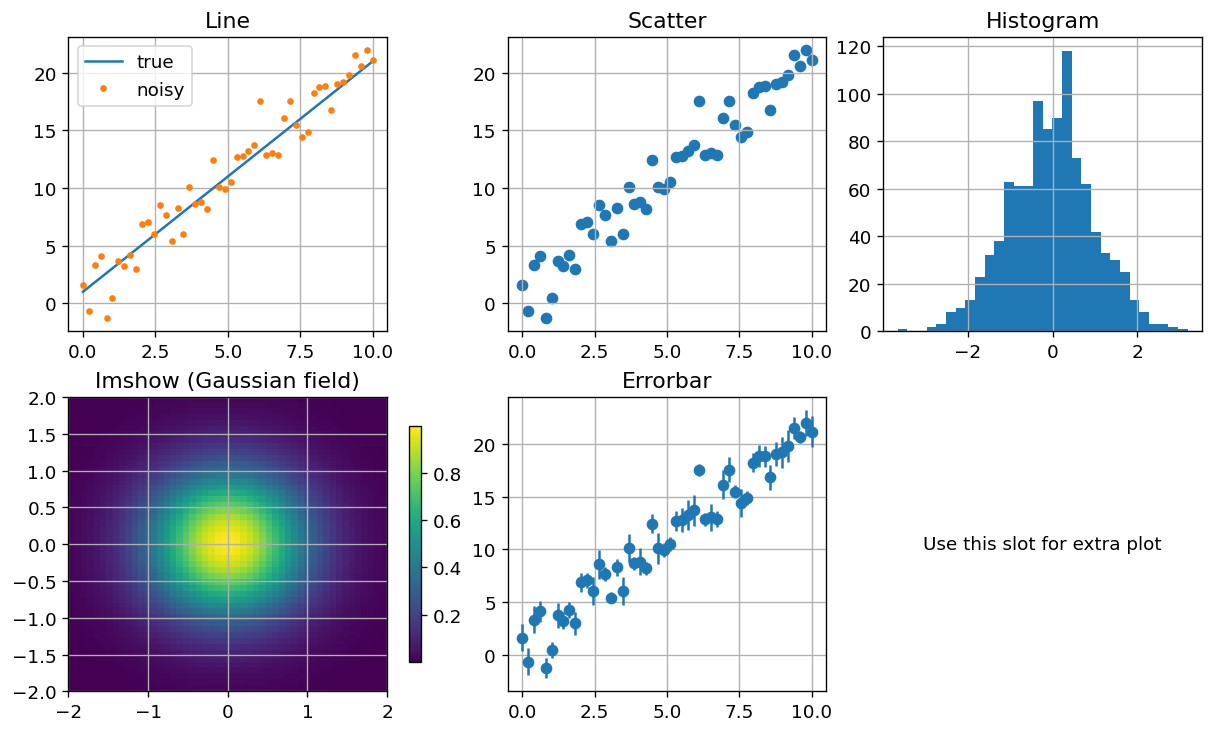

In [6]:
# Data generation
rng = np.random.default_rng(42)
x = np.linspace(0, 10, 50)
y_true = 2.0 * x + 1.0
y_noisy = y_true + rng.normal(0, 2.0, size=x.size)

fig, axs = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True)

# Line
axs[0,0].plot(x, y_true, label="true")
axs[0,0].plot(x, y_noisy, ".", label="noisy")
axs[0,0].set_title("Line")
axs[0,0].legend()

# Scatter
axs[0,1].scatter(x, y_noisy)
axs[0,1].set_title("Scatter")

# Histogram
data = rng.normal(loc=0.0, scale=1.0, size=1000)
axs[0,2].hist(data, bins=30)
axs[0,2].set_title("Histogram")

# Imshow (heatmap-like)
grid_x = np.linspace(-2, 2, 50)
grid_y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(grid_x, grid_y)
Z = np.exp(-(X**2 + Y**2))
im = axs[1,0].imshow(Z, extent=[grid_x.min(), grid_x.max(), grid_y.min(), grid_y.max()],
                     origin="lower", aspect="auto")
axs[1,0].set_title("Imshow (Gaussian field)")
fig.colorbar(im, ax=axs[1,0], shrink=0.8)

# Errorbar
yerr = rng.uniform(0.5, 1.5, size=x.size)
axs[1,1].errorbar(x, y_noisy, yerr=yerr, fmt="o")
axs[1,1].set_title("Errorbar")

# Empty slot for future (e.g., bar or boxplot)
axs[1,2].text(0.5, 0.5, "Use this slot for extra plot", ha="center", va="center")
axs[1,2].set_axis_off()

plt.show()


## התאמות מתקדמות  
מעבר ליכולות הבסיסיות של Matplotlib, קיימות פונקציות מתקדמות שמאפשרות להציג נתונים בצורה מדעית מדויקת וברורה יותר. שימוש נכון בהן חשוב במיוחד בפיזיקה, שבה לעיתים קרובות נדרשים להציג תופעות המתפרשות על פני **סדרי גודל רבים** או לשלב **יחידות שונות** על אותו תרשים.  

- **סולמות לוגריתמיים**: `ax.set_xscale('log')`, `ax.set_yscale('log')` — מאפשרים להציג נתונים המשתנים באקספוננט או על פני כמה סדרי גודל, כמו דעיכה רדיואקטיבית או ספקטרום תדרים. שימוש נכון בסולם לוגריתמי יכול להפוך עקומה לא ליניארית לקו ישר, ולחשוף קשרים חבויים.  
- **טיקים ותוויות**: מאפשרים שליטה מלאה באופן הצגת המספרים בצירים (מדעי, אקספוננציאלי או רגיל), וכן הוספת **יחידות פיזיקליות** לכותרות הצירים. התאמות אלו מבטיחות שהגרף יהיה קריא ונכון גם לקהל מדעי.  
- **מקרא ו־annotations**: הוספת מקרא (legend) חיונית כשיש כמה עקומות באותו גרף. בעזרת `ax.annotate` ניתן גם להדגיש נקודות קריטיות בנתונים (כמו מקסימום, חצי־חיים או תדר תהודה), ולהסביר אותן באמצעות חצים וטקסט.  
- **ציר תאום**: `()ax.twinx` או `()ax.twiny` מאפשרים להציג שתי סקאלות יחידות שונות באותו תרשים (למשל טמפרטורה ב־K וב־°C, או תדר לעומת אורך גל), מבלי לבלבל את הקורא.  
- **Colormaps**: שימוש במפות צבעים מדעיות (כמו `viridis` או `inferno`) מאפשר קידוד של פרמטר נוסף באמצעות צבע. זה חשוב במיוחד להצגת סדרות של ניסויים או סימולציות, תוך שמירה על נגישות גם לעיוורי צבעים.  

```{note} 
ביחד, התאמות אלו מאפשרות לא רק ליצור גרף יפה יותר, אלא להעביר מסר פיזיקלי ברור ומדויק, ולחסוך לקורא את הצורך בניחושים או חישובים נוספים.  
```


## דוגמה מסכמת 
נשתמש בעקומות דעיכה אקספוננציאליות כדי להדגים **שימושי Matplotlib מתקדמים**:  
סולמות לוגריתמיים, טיקים ותוויות עם יחידות, מקרא ו־annotations, **ציר תאום** ליחידות חלופיות, **Colormap** עם Colorbar, ושמירה לקובץ.  

`````{admonition} פיזיקלית, המודל יכול לייצג מגוון תהליכים דומים:
:class :tip
- **קירור ניוטוני**: גוף חם בטמפרטורה $T_0$ מתקרר אל טמפרטורת סביבה $T_{\rm amb}$ על פי  

  $$
  T(t) = T_{\rm amb} + (T_0 - T_{\rm amb}) e^{-t/\tau}
  $$
  
- **פריקת קבל במעגל RC**: המתח דועך לפי $V(t)=V_0 e^{-t/RC}$.
- **דעיכת רדיואקטיביות**: מספר גרעינים $N(t)=N_0 e^{-\lambda t}$.

כל אלה חולקים את הצורה המתמטית של דעיכה אקספוננציאלית עם קבוע זמן $\tau$. 
`````

ראשית, נייבא את הספריות והפונקציות בהן נשתמש:


In [7]:
# Core imports for all functions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib import colormaps


### 1) יצירת נתונים
בקטע מוגדרות שתי פונקציות עזר פשוטות:

1. **`()make_data`**  
   - מחזירה את פרמטרי הבעיה:  
     - `T_amb` — טמפרטורת סביבה (293.15 K ≈ 20°C).  
     - `T0` — טמפרטורה התחלתית (373.15 K ≈ 100°C).  
     - `taus` — מערך של קבועי זמן אופייניים [שניות] (0.5, 2, 10, 50).  
   - בנוסף יוצרת מערך זמנים `t` הנפרס על פני **חמישה סדרי גודל** (מ־0.01 עד 1000 שניות), באמצעות `np.logspace`, כך שנוכל לעבוד בקלות עם סולם לוגריתמי בציר ה־x.

2. **`model_T(t, tau, T_amb, T0)`**  
   - מחשבת את פונקציית הדעיכה האקספוננציאלית:  

     $$
     T(t) = T_{\rm amb} + (T_0 - T_{\rm amb}) \, e^{-t/\tau}
     $$  
     
   - זוהי הצורה הכללית של מודלים כמו קירור ניוטוני, פריקת קבל במעגל RC או דעיכה רדיואקטיבית.  
   - הפונקציה מקבלת וקטור זמנים `t`, קבוע זמן `tau`, ואת הפרמטרים הפיזיקליים, ומחזירה את הערכים של $T(t)$.

בקצרה: **`make_data` מגדירה נתוני התחלה ורשת זמנים לוגריתמית, ו־`model_T` מחזירה את פתרון הדעיכה עבורם.**


In [8]:
def make_data():
    """Create parameters and a log-spaced time grid."""
    T_amb = 293.15                 # K (ambient, ~20°C)
    T0    = 373.15                 # K (initial, ~100°C)
    taus  = np.array([0.5, 2.0, 10.0, 50.0])  # s (span decades)
    t     = np.logspace(-2, 3, 800)          # log grid for x-scale
    return T_amb, T0, taus, t

def model_T(t, tau, T_amb, T0):
    """Exponential decay model: T(t)=T_amb + (T0-T_amb)*exp(-t/tau)."""
    return T_amb + (T0 - T_amb)*np.exp(-t/tau)


### 2) הכנה ל־Colormap
בקטע מוגדרת הפונקציה **`prepare_colormap(taus, cmap_name="viridis")`** שמטרתה להכין מפת צבעים לשימוש עקבי בגרפים:

- **`Normalize`**  
  - אובייקט מ־Matplotlib שממיר ערכים נומריים (כאן: ערכי $\tau$) לסולם $[0,1]$.  
  - ההגדרה `vmin=np.min(taus), vmax=np.max(taus)` מבטיחה שהערך הקטן ביותר של $\tau$ יתאים לתחילת הסקאלה (0), והגדול ביותר לסופה (1).  
  - זה מאפשר למפות את כל ערכי $\tau$ בצורה פרופורציונלית לצבעים.

- **`colormaps.get_cmap(cmap_name)`**  
  - הפונקציה המומלצת כיום (במקום `get_cmap`, שהוצאה משימוש) להחזרת מפת הצבעים המבוקשת.  
  - ברירת המחדל `"viridis"` היא אחת מהמפות המומלצות להצגה מדעית, עם מעבר חלק וברור של צבעים.

- הפונקציה מחזירה זוג: `(norm, cmap)`  
  - ניתן להשתמש ב־`cmap(norm(tau))` כדי לקבל צבע עקבי עבור כל ערך $\tau$.

בקצרה: הפונקציה **מכינה מנגנון שמתרגם ערכי $\tau$ לצבעים בהתאם למפת צבעים מדעית (כמו viridis)**, וכך כל גרף יהיה עקבי וברור מבחינה ויזואלית.


In [9]:
def prepare_colormap(taus, cmap_name="viridis"):
    """Return a Normalize and Colormap for consistent color coding by tau."""
    norm = Normalize(vmin=float(np.min(taus)), vmax=float(np.max(taus)))
    cmap = colormaps.get_cmap(cmap_name)  # new recommended syntax
    return norm, cmap

### 3) ציור הלוח העליון + סולם לוגריתמי בציר $x$
בקטע מוגדרת הפונקציה **`(...)plot_top_panel`**, שאחראית לצייר את התרשים העליון עם כל ההגדרות המתקדמות של Matplotlib:

1. **לולאת ציור העקומות**  
   - לכל ערך $\tau$ מחשבים את $T(t)$ באמצעות `model_T`.  
   - מציירים עם `(...)ax.plot` כאשר הצבע נקבע לפי `cmap(norm(tau))`, כלומר ערך $\tau$ מתורגם לצבע במפה.  
   - מוסיפים `label` כך שהעקומה תופיע במקרא עם הערך המתאים של $\tau$.

2. **סולם לוגריתמי בציר $x$**  
   - `ax.set_xscale("log")` הופך את ציר הזמן ללוגריתמי, שימושי להצגת תהליכים על פני סדרי גודל שונים.

3. **תוויות לצירים עם יחידות**  
   - `ax.set_xlabel(r"$t$ (s)")` ו־`ax.set_ylabel(r"$T$ (K)")` מציינים את המשתנה והיחידות.

4. **ticks ותוויות מדעיות**  
   - `ax.ticklabel_format(axis="y", style="sci", scilimits=(-2,2), useMathText=True)` מציג את המספרים בציר $y$ בסגנון מדעי (כוחי 10), עם תחום שבו זה נכפה.

5. **התאמות נוספות לticks**  
   - `(...)ax.tick_params` קובע סגנון טיקים אחיד (כלפי פנים, גם בצירים עליונים וימניים).

6. **רשת גרף (grid)**  
   - `ax.grid(True, which="both", linestyle="-", alpha=0.2)` מוסיף רשת עדינה גם לטיקים משניים, מה שמקל על קריאת ערכים.

7. **מקרא (legend)**  
   - `(...)ax.legend` יוצר מקרא עם כותרת "Cooling curves", המציג איזו עקומה מתאימה לאיזה $\tau$.

8. **כותרת לגרף**  
   - `(...)ax.set_title` נותן כותרת ברורה שמסבירה שזהו תרשים להדגמת שימושים מתקדמים ב־Matplotlib.

בקצרה: הפונקציה מציירת את עקומות הקירור $T(t)$ עבור ערכי $\tau$ שונים, ומדגימה **שילוב של סולם לוגריתמי, טיקים מדעיים, מקרא, רשת וכותרות** — כלומר את רוב פיצ'רי הבסיס המתקדמים של Matplotlib.


In [10]:
def plot_top_panel(ax, t, taus, T_amb, T0, norm, cmap):
    """Plot T(t) curves with log x-scale, scientific ticks, and legend."""
    for tau in taus:
        T = model_T(t, tau, T_amb, T0)
        ax.plot(t, T, color=cmap(norm(tau)),
                label=rf"$\tau={tau:g}\,\mathrm{{s}}$")  # plot() with label for legend
    
    ax.set_xscale("log")                  # <- log scale on x
    ax.set_xlabel(r"$t$ (s)")             # <- axis label with units
    ax.set_ylabel(r"$T$ (K)")
    
    ax.ticklabel_format(axis="y", style="sci", scilimits=(-2, 2), useMathText=True)  # scientific y
    ax.tick_params(axis="both", which="both", direction="in", top=True, right=True)  # tidy ticks
    ax.grid(True, which="both", linestyle="-", alpha=0.2)                            # grid for both
    ax.legend(title="Cooling curves", loc="upper right")                             # legend
    
    ax.set_title("Matplotlib advanced features on exponential cooling")

### 4) הוספת Annotation לנקודת חצי־זמן
בקטע מוגדרת הפונקציה **`(...)add_annotation`**, שמטרתה להדגיש נקודה פיזיקלית חשובה על הגרף באמצעות כלי ה־annotation של Matplotlib:

1. **חישוב נקודת חצי־זמן**  
   - $t_{1/2} = \tau \ln 2$ — הזמן שבו הטמפרטורה ירדה בדיוק למחצית הדרך בין $T_0$ ל־$T_{\rm amb}$.  
   - $T_{1/2} = T_{\rm amb} + \tfrac{1}{2}(T_0 - T_{\rm amb})$ — הערך של הטמפרטורה באותו זמן.

2. **סימון הנקודה בגרף**  
   - `(...)ax.plot` מצייר נקודה אדומה קטנה (`"o"`) במיקום $(t_{1/2}, T_{1/2})$.

3. **קו עזר אנכי**  
   - `(...)ax.axvline` מוסיף קו אנכי מקווקו באותו $t_{1/2}$ כדי להדגיש את הזמן הזה על כל התרשים.

4. **הוספת הערה (Annotation)**  
   - `(...)ax.annotate` מציב טקסט "half-time" ליד הנקודה, עם חץ המצביע עליה.  
   - הפרמטרים `xy`, `xytext`, `arrowprops` שולטים על מיקום החץ, מיקום הטקסט, וסגנון החץ.

בקצרה: הפונקציה מוסיפה **סימון נקודתי, קו עזר וטקסט עם חץ** כדי להמחיש בצורה ברורה את מושג ה־**חצי־זמן** על הגרף.


In [11]:
def add_annotation(ax, T_amb, T0, tau_sel=2.0):
    """Add an annotation for the half-time point t_half = tau*ln(2)."""
    t_half = tau_sel*np.log(2.0)
    T_half = T_amb + 0.5*(T0 - T_amb)
    ax.plot(t_half, T_half, "o", color="crimson", ms=6)   # marker at the point
    ax.axvline(t_half, color="crimson", lw=1, ls="--", alpha=0.6)  # helper line
    ax.annotate("half-time",                               # annotate() with arrow
                xy=(t_half, T_half),
                xytext=(12, T_half + 8),
                textcoords="data",
                arrowprops=dict(arrowstyle="->", lw=1.2))


### 5) ציר תאום ליחידות חלופיות (K ↔ °C)
בקטע מוגדרת הפונקציה **`add_twin_axis_celsius(ax)`**, שמטרתה להוסיף **ציר $y$ ימני** שבו הערכים מוצגים במעלות צלזיוס (°C), בהתאמה לציר השמאלי שמוצג בקלווין (K).

1. **יצירת ציר תאום**  
   - `()ax.twinx` יוצר ציר חדש שמשתף את אותו ציר $x$ אך מאפשר תוויות שונות בציר $y$ הימני.  
   - מגדירים את התווית שלו כ־"$T$ (°C)".

2. **יישור תחומי הציר**  
   - קוראים את תחום הערכים של הציר השמאלי (`()y0, y1 = ax.get_ylim`).  
   - מגדירים את הציר הימני כך שיתחיל מ־`y0 - 273.15` ועד `y1 - 273.15`, כלומר הזזה של כל הטווח ממעלות קלווין ל־°C.  
   - כך מבטיחים ששני הצירים מציגים את אותו גרף, אבל ביחידות שונות.

3. **סנכרון הטיקים**  
   - לוקחים את רשימת הטיקים מהציר השמאלי (`()ax.get_yticks`).  
   - קובעים טיקים בצד ימין באותן נקודות ויזואליות, אך עם ערכים מומרות ל־°C.  
   - לדוגמה: אם בצד שמאל מופיע `300 K`, בצד ימין יופיע `26.9 °C` בדיוק באותו גובה.

4. **ניקיון גרפי**  
   - מכבים את ה־grid בצד הימני (`ax2.grid(False)`), כדי למנוע רשת כפולה.  
   - קובעים שטיקים פונים פנימה (`ax2.tick_params(direction="in")`) כדי להבדיל מציר שמאל.

5. **החזרת הציר**  
   - מחזירים את הציר הימני (`ax2`) כדי שניתן יהיה להמשיך לעבוד עליו אם צריך.

בקצרה: הפונקציה יוצרת **ציר תאום בצד ימין** עם יחידות צלזיוס, מיושר ומסונכרן עם הציר השמאלי בקלווין, כך שהקורא יכול לקרוא את הגרף בשתי מערכות יחידות במקביל.



In [12]:
def add_twin_axis_celsius(ax):
    """Add a right y-axis in °C aligned with the left y-axis in K."""
    ax2 = ax.twinx()                          # create a twin y-axis
    ax2.set_ylabel(r"$T$ (°C)")
    
    # Align y-limits so ticks match line-by-line
    y0, y1 = ax.get_ylim()
    ax2.set_ylim(y0 - 273.15, y1 - 273.15)    # same visual positions
    
    # Copy left ticks and show converted labels on the right
    left_ticks = ax.get_yticks()
    ax2.set_yticks(left_ticks - 273.15)       # place ticks at matching heights
    ax2.set_yticklabels([f"{v-273.15:.1f}" for v in left_ticks])
    
    ax2.grid(False)                            # keep grid only on left
    ax2.tick_params(direction="in")
    return ax2


### 6) הוספת Colorbar
בקטע מוגדרת הפונקציה **`add_colorbar(fig, ax, norm, cmap)`**, שמטרתה להוסיף **סרגל צבעים (Colorbar)** לגרף — כדי להסביר איך הצבעים משויכים לערכים של קבוע הזמן $\tau$.

1. **יצירת `ScalarMappable`**  
   - `ScalarMappable(norm=norm, cmap=cmap)` יוצר אובייקט שמתרגם ערכים נומריים (כאן ערכי $\tau$) לצבעים.  
   - משתמשים באותו `norm` (נורמליזציה לערכים בין המינימום והמקסימום של $\tau$) ובאותו `cmap` (מפת הצבעים) שהוגדרו עבור הגרף, כדי להבטיח עקביות בין הצבעים בעקומות לבין הסרגל.

2. **קביעת מערך דמה**  
   - `([])sm.set_array` נדרש טכנית כדי ש־Matplotlib ידע שיש "נתונים" לצבוע. כאן מספיק מערך ריק.

3. **הוספת Colorbar לגרף**  
   - `fig.colorbar(sm, ax=ax, pad=0.02)` מצייר סרגל צבעים בצד הגרף הנתון (`ax`).  
   - הפרמטר `pad` שולט על המרווח בין הסרגל לבין הגרף.

4. **הוספת תווית לסרגל**  
   - `cbar.set_label(r"time constant $\tau$ (s)")` מוסיף כיתוב ברור לסרגל: "time constant τ (s)", עם נוסחת $\tau$ ב־LaTeX.

בקצרה: הפונקציה יוצרת **סרגל צבעים שמראה איזה ערך $\tau$ מתאים לכל צבע**, ומציבה אותו ליד התרשים בצורה עקבית וברורה.


In [13]:
def add_colorbar(fig, ax, norm, cmap):
    """Attach a colorbar that explains the color coding of τ."""
    sm = ScalarMappable(norm=norm, cmap=cmap)  # create mappable without image
    sm.set_array([])                           # dummy array to enable colorbar
    cbar = fig.colorbar(sm, ax=ax, pad=0.02)   # colorbar attached to this axes
    cbar.set_label(r"time constant $\tau$ (s)")

### 7) לוח תחתון עם $y$ לוגריתמי
בקטע מוגדרת הפונקציה **`(...)plot_bottom_loglog`**, שמטרתה לצייר את ההפרש  
$\Delta T(t) = T(t) - T_{\rm amb}$ על **צירים לוגריתמיים** (גם $x$, גם $y$) כדי להדגים את השימוש ב־`set_yscale('log')`.

1. **ציור עקומות $\Delta T$**  
   - עבור כל ערך $\tau$ מחשבים את ההפרש $\Delta T(t)$ ע"י קריאה ל־`model_T`.  
   - מציירים עם `(...)ax_logy.plot`, הצבעים מוגדרים לפי `cmap(norm(tau))` כך שכל $\tau$ מקבל צבע ייחודי עקבי.

2. **הגדרת סולמות לוגריתמיים**  
   - `ax_logy.set_xscale("log")` הופך את ציר $x$ (הזמן) ללוגריתמי, כדי להציג סדרי גודל רבים בצורה ברורה.  
   - `ax_logy.set_yscale("log")` הופך את ציר $y$ (ההפרש $\Delta T$) ללוגריתמי.  
   - שילוב של שניהם יוצר תרשים **log–log**, שבו דעיכה אקספוננציאלית מתקבלת כקו ישר כאשר מוצג $\log(\Delta T)$ מול $t$.

3. **תוויות עם יחידות**  
   - `(...)ax_logy.set_xlabel` ו־`(...)ax_logy.set_ylabel` מבהירים את המשתנים והיחידות (שניות ו־קלווין).

4. **רשת גרף**  
   - `ax_logy.grid(True, which="both", ...)` מוסיפה רשת גם לטיקים הראשיים וגם למשניים, כדי להקל על קריאת ערכים בלוגריתם.

5. **התאמת טיקים**  
   - `(...)ax_logy.tick_params` מכוונת את הטיקים כלפי פנים (`direction="in"`) ומפעילה טיקים גם בצירים העליונים והימניים.

6. **כותרת**  
   - `(...)ax_logy.set_title` מציינת במפורש שמדובר בצירים log–log, ומדגישה את השימוש ב־`set_yscale('log')`.

בקצרה: הפונקציה מציירת את $\Delta T$ על תרשים **לוגריתמי כפול** (log–log), ומדגימה בצורה ברורה את **השימוש ב־Matplotlib לקביעת סולמות לוגריתמיים בצירים**.


In [14]:
def plot_bottom_loglog(ax_logy, t, taus, T_amb, T0, norm, cmap):
    """Plot ΔT on log-log scales to demonstrate set_yscale('log')."""
    for tau in taus:
        dT = model_T(t, tau, T_amb, T0) - T_amb
        ax_logy.plot(t, dT, color=cmap(norm(tau)))        # plot ΔT curves
    
    ax_logy.set_xscale("log")                             # log x
    ax_logy.set_yscale("log")                             # log y
    ax_logy.set_xlabel(r"$t$ (s)")
    ax_logy.set_ylabel(r"$\Delta T$ (K)")
    ax_logy.grid(True, which="both", linestyle="-", alpha=0.2)  # grid
    ax_logy.tick_params(direction="in", top=True, right=True)
    ax_logy.set_title(r"ΔT on log–log axes (using set_yscale('log'))")

### 8) הרכבה, הצגה ושמירה
בקטע מוגדרת הפונקציה **`run_matplotlib_advanced_demo(savepath=None)`**, שהיא פונקציית־על שמחברת את כל החלקים הקודמים לכדי דוגמה אחת מלאה.  
המטרה היא להציג בצורה מרוכזת את כל השימושים המתקדמים ב־Matplotlib, עם אפשרות לשמור את התוצאה לקובץ.

1. **יצירת נתונים ומפת צבעים**  
   - קריאה ל־`()make_data` מייצרת את הפרמטרים (טמפרטורות, קבועי זמן ורשת זמן).  
   - קריאה ל־`(...)prepare_colormap` מגדירה את מנגנון מיפוי הצבעים לפי $\tau$.

2. **יצירת פיגורה עם שני תרשימים (subplots)**  
   - `plt.subplots(2, 1, ...)` מחזירה פיגורה (`fig`) ושני צירים:  
     - `ax` — לוח עליון.  
     - `ax_logy` — לוח תחתון.  
   - `constrained_layout=True` דואג לפריסה מסודרת ללא חפיפות.

3. **ציור הלוח העליון**  
   - `(...)plot_top_panel` מצייר את $T(t)$ עם כל ההגדרות המתקדמות (סולם לוגריתמי, מקרא, טיקים מדעיים).  
   - `(...)add_annotation` מוסיף חץ וטקסט לנקודת חצי־הזמן.  
   - `(...)add_twin_axis_celsius` יוצר ציר ימני עם יחידות °C מסונכרנות עם קלווין.  
   - `(...)add_colorbar` מוסיף סרגל צבעים שמסביר את הקידוד לפי $\tau$.

4. **ציור הלוח התחתון**  
   - `(...)plot_bottom_loglog` מציג את $\Delta T(t)$ על צירי log–log (גם $x$, גם $y$ לוגריתמיים).

5. **שמירה אופציונלית**  
   - אם המשתמש מספק נתיב `savepath`, התמונה נשמרת לקובץ ע"י `(...)fig.savefig`.  
   - ניתן לשמור בפורמט וקטורי (PDF/SVG) או רסטר (PNG), לפי הסיומת.

6. **הצגה על המסך**  
   - `()plt.show` מציגה את הפיגורה עם שני התרשימים.

In [15]:
def run_matplotlib_advanced(savepath=None):
    """Build the figure, call all plot helpers, and optionally save to file."""
    # Data & color mapping
    T_amb, T0, taus, t = make_data()
    norm, cmap = prepare_colormap(taus, "viridis")
    
    # Figure with two axes
    fig, (ax, ax_logy) = plt.subplots(2, 1, figsize=(8.4, 7.2), constrained_layout=True)
    
    # Top panel: advanced customizations
    plot_top_panel(ax, t, taus, T_amb, T0, norm, cmap)
    add_annotation(ax, T_amb, T0, tau_sel=2.0)
    add_twin_axis_celsius(ax)
    add_colorbar(fig, ax, norm, cmap)
    
    # Bottom panel: log–log ΔT
    plot_bottom_loglog(ax_logy, t, taus, T_amb, T0, norm, cmap)
    
    # Optional save (vector if .pdf/.svg; raster if .png)
    if savepath is not None:
        fig.savefig(savepath, bbox_inches="tight")
    
    plt.show()

### 9) קריאה להרצה
לסיום, נקרא לפונקציה הראשית `()run_matplotlib_advanced`את הדמו ולהציג את התוצאה. ניתן להעביר `savepath="advanced_matplotlib.pdf"` לשמירה.


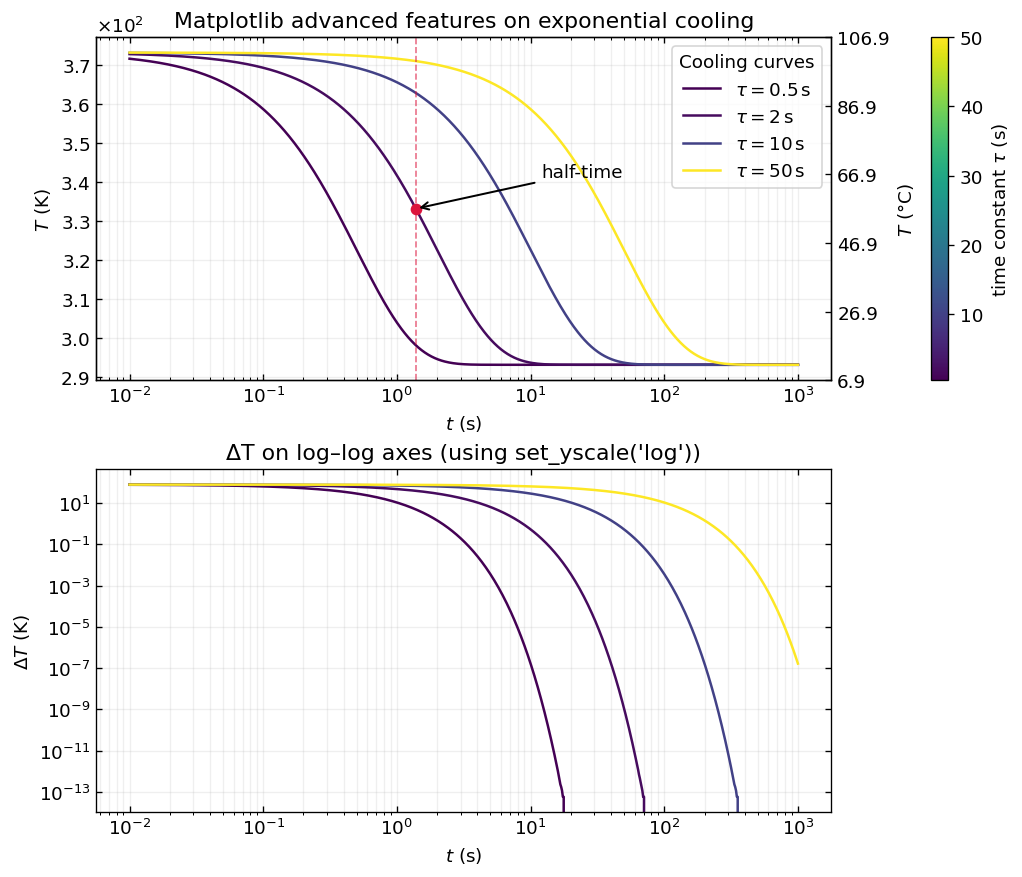

In [16]:
run_matplotlib_advanced()  # or run_matplotlib_advanced("advanced_matplotlib_demo.pdf")

In [17]:
import json
from jupyterquiz import display_quiz

quiz_json = \
'''
[
  {
    "question": "אם ברצוננו להציג נתונים על פני שלושה סדרי גודל בציר x, הבחירה הטובה היא:",
    "type": "many_choice",
    "answers": [
      {
        "answer": "<code>ax.set_xscale('linear')</code>",
        "correct": false,
        "feedback": "לא נכון — סולם ליניארי לא מתאים לפריסה על פני סדרי גודל רבים."
      },
      {
        "answer": "<code>ax.set_xscale('log')</code>",
        "correct": true,
        "feedback": "נכון! סולם לוגריתמי בציר x מציג היטב נתונים על פני כמה סדרי גודל."
      },
      {
        "answer": "<code>ax.set_yscale('log')</code>",
        "correct": false,
        "feedback": "זה משנה את סולם ציר ה-y, לא את ציר ה-x."
      },
      {
        "answer": "להשאיר ברירת מחדל",
        "correct": false,
        "feedback": "ברירת המחדל היא סולם ליניארי, שאינו מתאים כאן."
      }
    ]
  },
  {
    "question": "מה יוצר אובייקט צירים חדש בשיטה המומלצת?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "<code>fig = plt.figure()</code>",
        "correct": false,
        "feedback": "זה יוצר Figure בלבד, ללא Axes ברירת מחדל."
      },
      {
        "answer": "<code>ax = plt.axes()</code>",
        "correct": false,
        "feedback": "אמנם יוצר Axes, אך השיטה המומלצת והנפוצה היא <code>plt.subplots()</code>."
      },
      {
        "answer": "<code>fig, ax = plt.subplots()</code>",
        "correct": true,
        "feedback": "נכון! זו הדרך המומלצת: מקבלים גם Figure וגם Axes מוכנים לשימוש."
      },
      {
        "answer": "<code>plt.plot(...)</code>",
        "correct": false,
        "feedback": "זו קריאה בסגנון pyplot; לא יוצרת במפורש אובייקטי Figure ו-Axes לעבודה מבוססת-אובייקטים."
      }
    ]
  },
  {
    "question": "להצגת שדה דו־ממדי (כמו טמפרטורה על רשת), מה מתאים?",
    "type": "many_choice",
    "answers": [
      {
        "answer": "<code>plot</code>",
        "correct": false,
        "feedback": "plot מתאים לעקומות/קווים, לא לשדות דו־ממדיים."
      },
      {
        "answer": "<code>scatter</code>",
        "correct": false,
        "feedback": "scatter מציג נקודות בדידות; לשדה רציף עדיפה הדמיה רסטרית."
      },
      {
        "answer": "<code>hist</code>",
        "correct": false,
        "feedback": "hist מציג התפלגות חד־ממדית (היסטוגרמה), לא מפה דו־ממדית."
      },
      {
        "answer": "<code>imshow</code>",
        "correct": true,
        "feedback": "נכון! imshow (או matshow) מתאימים להצגת שדות/מפות חום דו־ממדיות."
      }
    ]
  }
]
'''
myquiz = json.loads(quiz_json)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

## חלק ב' - Probabilities & Histograms

### מחולל אקראי מודרני

נשתמש בספריות NumPy ו-Matplotlib. נגדיר גם מחולל אקראי מודרני המאפשר שחזור של קוד על אף השימוש במספרים אקראיים (reproducibility).
מחולל מספרים "אקראיים" במחשב הוא למעשה **פסאודו-אקראי**: הוא מייצר רצף דטרמיניסטי. קביעת **seed** מגדירה את המצב ההתחלתי ולכן מבטיחה יכולת שחזור מלאה של הניסוי:
אותו seed ישחזר את אותו רצף  שיוביל לאותן תוצאות. 
זה קריטי למחקר חישובי: דיבוג, בדיקות יחידה, ביקורות עמיתים, והפעלות חוזרות.

```{note}
במחברת זאת נשתמש ב`default_rng` ממספר סיבות:
1. **בידוד מצב**:  `default_rng` יוצרת כל קריאה ל `Generator` ששומר מצב פנימי משלו. כך נמנע מיצירה של "מצב גלובלי" כמו ב-`np.random.seed`/`np.random` הישנים.
2. **יציבות**: קוד המשתמש ב-`Generator` צפוי יותר לאורך גרסאות, וקל יותר לשלוט בו.
3. **ממשק נקי**: פונקציות דגימה אחידות תחת `rng.*` (למשל `rng.normal`, `rng.poisson`, `rng.choice`).
```
כיצד נקבע seed?
- נקבע seed בראשית הקוד בפתיחה (למשל `seed=42`) כדי לאפשר שחזור.
- נקפיד **לא** לעשות re-seed בלולאה או בכל קריאה ,זה מאתחל את אותו הרצף שוב ושוב (באג נפוץ).
- העדיפו פונקציות שמקבלות `rng` כפרמטר — כך תכתבו קוד נקי מתלות גלובלית.


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Modern RNG (prefer over legacy np.random.*)
rng = np.random.default_rng(seed=42)

np.__version__, "RNG OK"

('2.3.1', 'RNG OK')

## הסתברויות נפוצות

בעולם אמיתי מדידות ותרחישים רבים מושפעים מאקראיות: רעש חיישנים, דעיכה רדיואקטיבית, הגעת פוטונים לגלאי, תנודות תרמיות, זמני המתנה לאירוע, ועוד.  
במקום לתאר כל תוצאה בנפרד, מתארים את התופעה בעזרת **התפלגות הסתברות** — תבנית שמספרת כמה סביר לקבל ערכים שונים. בעזרת `NumPy` אפשר **לדגום** (להגריל) במהירות כמויות גדולות של נתונים לפי התפלגויות שונות, ולבדוק השערות/מודלים בצורה חישובית.

### מושגים בסיסיים (בקיצור)
- **משתנה מקרי**: גודל שערכו נקבע באקראי (למשל: מספר חלקיקים שנספר בשנייה).  
- **דיסקרטי** מול **רציף**: ערכים שלמים (0,1,2,…) לעומת רצף ממשי.  
- **PMF (Probability Mass funcion), PDF (Probability Distribution Function)**: פונקציית מסה (לדיסקרטי) / פונקציית צפיפות (לרציף) — מתארות “כמה סביר” כל ערך.  
- **CDF (Cumulative Distribution Function)**: פונקציה מצטברת $(F(x)=P(X\le x))$ — “כמה מתחת לסף”.  
- **תוחלת ושונות**: ממוצע “צפוי” ופיזור סביבו.  
- **היסטוגרמה**: קירוב אמפירי ל-PDF/CDF מתוך דגימות בפועל.


`````{admonition}  למה דווקא NumPy?
:class: tip
- **מהיר ווקטורי**: דוגמים ועובדים על מערכים שלמים בבת אחת (מאות אלפים ומיליונים של ערכים).  
- **מחולל אקראיות מודרני**: `numpy.random.Generator` מספק דגימה מהתפלגויות רבות (למשל `binomial`, `poisson`, `normal`, `exponential`, `uniform`, `geometric`).  
- **שיחזור תוצאות** (reproducibility): קובעים seed, למשל `rng = np.random.default_rng(42)`.
`````

`````{admonition} שימושים נפוצים לפיזיקאים
:class: tip
- **רעש מדידה וגאוסיאני**: מודלים עם התפלגות נורמלית $ \mathcal{N}(\mu,\sigma^2) $ לרעש חיישנים.  
- **ספירה של אירועים נדירים**: פואסון $ \text{Poisson}(\lambda) $ לתהליך דעיכה/ספירת פוטונים בזמן קבוע.  
- **ניסויים בעלי “הצלחה/כישלון”**: ברנולי/בינומי (יעילות גלאי, תשואה של שלב במערכת).  
- **זמני המתנה/חיי־ממוצע**: אקספוננציאלית $ \text{Exp}(\lambda) $ לזמן עד אירוע הבא.  
- **דיפוזיה/הליכה אקראית**: סכימת צעדים אקראיים → בזכות משפט הגבול המרכזי מתקבלת התפלגות נורמלית בקירוב.  
- **מונטה-קרלו**: סימולציה של מערכות מורכבות והערכת אינטגרלים/אי-ודאות ע"י דגימה מרובה.  
- **התאמת מודלים**: יצירת נתוני סימולציה להשוואה למדידה, הערכת פרמטרים ובדיקת רגישות.  
`````

`````{admonition} איך עובדים בפועל?
:class: tip
1. בוחרים מודל הסתברותי שמתאר את הפיזיקה (איזו התפלגות? אילו פרמטרים?).  
2. דוגמים נתונים עם `Generator` של NumPy.  
3. בונים **היסטוגרמה** ומשווים ל-PDF/CDF תיאורטיים.  
4. מחשבים סטטיסטיקות (ממוצע, שונות, אחוזונים) ובודקים האם המדידה תואמת למודל.  
5. חוזרים ומכוונים פרמטרים/השערות לפי הצורך.
`````

## היסטוגרמות  
**היסטוגרמה** היא אחד הכלים הבסיסיים ביותר לניתוח נתונים אמפיריים. היא מחלקת את ציר $x$ ל־*מחיצות* (bins), וסופרת כמה דגימות נופלות בכל מחיצה. כך מתקבלת תמונה ויזואלית של **פיזור הנתונים**: היכן הם מרוכזים, כמה הם מפוזרים, והאם יש "זנבות" או ערכים קיצוניים.  

![Alt text](https://plot.ly/static/img/literacy/fig3.gif)

כאשר מציבים את הפרמטר `density=True`, ההיסטוגרמה מנורמלת כך שסך השטח מתחת לעמודות שווה ל־1.  
במצב זה היא מהווה **קירוב ל־PDF** (פונקציית צפיפות הסתברות) עבור משתנים רציפים, או ל־PMF (פונקציית מסה הסתברותית) עבור משתנים בדידים.  
זה מאפשר להשוות בצורה ישירה בין נתונים אמפיריים לבין התפלגות תאורטית.  

`````{admonition} למה היסטוגרמות חשובות?
:class: tip
- מאפשרות **זיהוי צורת ההתפלגות**: האם היא סימטרית? גאוסיאנית? א־סימטרית?  
- מסייעות לגלות **ערכים חריגים** או פיזור רחב.  
- מאפשרות **השוואה בין ניסוי לתיאוריה** על ידי הנחת עקומה תאורטית מעל ההיסטוגרמה.  
- מהוות בסיס לחישוב **סטטיסטיקות אמפיריות** כמו הסתברויות משוערות (למשל: $P(X>1)$).  
`````

`````{admonition} בחירת מספר מחיצות (Bins)  
:class: tip
מספר מחיצות משפיע מאוד על המראה והאינפורמציה שבהיסטוגרמה:  
- מעט מדי מחיצות → האינפורמציה "נמרחת" ואיבדנו פרטים חשובים.  
- יותר מדי מחיצות → ההיסטוגרמה "רועשת" מדי וקשה לזהות דפוסים.  

אין כלל אחד "נכון", אבל קיימים כמה כללי אצבע שימושיים:  
- **שורש הדגימות**: $\sqrt{N}$ — מתן סדר גודל ראשוני.  
- **כלל Sturges**: $\lceil \log_2(N) + 1 \rceil$ — מתאים לדגימות שאינן ענקיות.  
- **כלל Freedman–Diaconis**:  
  - רוחב מחיצה: $h = 2 \cdot IQR \cdot N^{-1/3}$  
    (כאשר $IQR$ = הטווח הבין־רבעוני).  
  - מספר מחיצות: $\dfrac{\max - \min}{h}$.  
  כלל זה מתחשב בפיזור בפועל של הנתונים, ולכן לרוב נותן תוצאה מאוזנת יותר.  
`````

```{note}
- ב־NumPy קיימת הפונקציה `numpy.histogram` שמחזירה את מספר הספירות בכל מחיצה ואת גבולות המחיצות — שימושי לחישוב הסתברויות אמפיריות.  
- ב־Matplotlib קיימת `plt.hist` שמציירת את ההיסטוגרמה, ויכולה גם להחזיר את אותם נתונים.  
- במצבים מתקדמים יותר משתמשים גם בצפיפות קרנל (Kernel Density Estimation — KDE) שמחליקה את ההיסטוגרמה ויוצרת קירוב רציף יותר ל־PDF.  
```

לפני שנבחן מספר התפלגויות שונות, נבנה פונקציה `show_hist_with_theory` שתציג את ההיסטוגרמה לכל התפלגות:
פונקציה זו נועדה **להציג היסטוגרמה של נתונים אמפיריים** (כגון דגימות מתוך התפלגות אקראית)  
ובמקביל, אם נרצה, גם **להשוות לעקומה תיאורטית** (PDF רציף או PMF דיסקרטי).  


In [19]:
# Common setup for all sections (Hebrew MD above; comments here are in English)
import numpy as np
import matplotlib.pyplot as plt
import math

# Global RNG for reproducibility
rng = np.random.default_rng(42)

def show_hist_with_theory(
    data,
    bins=40,
    density=True,
    title="",
    xlabel="",
    x_theory=None,
    y_theory=None,
    label_hist="Empirical (hist)",
    label_theory="Theory (PDF/PMF)"
):
    """Draw a histogram and overlay a theoretical curve/PMF with a legend."""
    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=bins, density=density, label=label_hist)
    if (x_theory is not None) and (y_theory is not None):
        plt.plot(x_theory, y_theory, label=label_theory)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("density" if density else "count")
    plt.legend()
    plt.show()



#### פרמטרים עיקריים:
- `data` — מערך הדגימות שנרצה להציג.  
- `bins` — מספר או גבולות מחיצות (ברירת מחדל: 40).  
- `density` — אם `True`, ההיסטוגרמה מנורמלת כך שהשטח הכולל = 1 (חשוב להשוואה ל־PDF).  
- `title` — כותרת לגרף.  
- `xlabel` — תווית ציר X.  
- `x_theory, y_theory` — נקודות $(x,y)$ של פונקציה תיאורטית להשוואה (למשל PDF/PMF).  
- `label_hist` / `label_theory` — שמות שיוצגו במקרא (legend) עבור ההיסטוגרמה ועבור העקומה התיאורטית.

`````{admonition} מה הפונקציה עושה?
:class: tip
1. יוצרת חלון גרפי חדש עם `plt.figure`.  
2. מציירת את ההיסטוגרמה של הנתונים עם תווית `"Empirical (hist)"`.  
3. אם סופקו ערכים תיאורטיים (`x_theory`, `y_theory`) — מוסיפה קו תיאורטי עם תווית `"Theory"`.  
4. מוסיפה כותרת, תוויות צירים, ומקרא (legend).  
5. מציגה את התוצאה בעזרת `()plt.show`. 
`````

In [20]:
import json
from jupyterquiz import display_quiz

quiz_hist = \
'''
[{
  "question": "נתון וקטור של 10,000 דגימות מתוך התפלגות נורמלית סטנדרטית.<br><br>מה עושה הפקודה:<br><br>counts, bins = np.histogram(data, bins=30, density=True)",
  "type": "many_choice",
  "answers": [
    {
      "answer": "מחלקת את הנתונים ל־30 מחיצות ומחזירה את ספירת הדגימות בכל מחיצה (counts) ואת גבולות המחיצות (bins), מנורמלים כך שהשטח הכולל מתחת להיסטוגרמה שווה ל־1",
      "correct": true,
      "feedback": "נכון! עם density=True, np.histogram מנרמלת את התוצאה לקירוב ל־PDF"
    },
    {
      "answer": "מייצרת גרף היסטוגרמה על המסך",
      "correct": false,
      "feedback": "לא נכון — np.histogram רק מחזירה נתונים, הציור נעשה עם plt.hist"
    },
    {
      "answer": "מחלקת את הנתונים ל־30 ערכים שווים בגודל",
      "correct": false,
      "feedback": "לא נכון — bins מתארים טווחים רציפים, לא חלוקה לכמות שווה של נתונים"
    },
    {
      "answer": "מחזירה את הממוצע והשונות של הנתונים",
      "correct": false,
      "feedback": "לא נכון — np.histogram לא מחשבת סטטיסטיקות כאלה"
    }
  ]
}]
'''
myquiz = json.loads(quiz_hist)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

### תיאוריה מול הדגמה אמפירית
הרעיון הוא לראות כיצד נתונים אקראיים אמיתיים שנדגמו מההתפלגות מתקרבים בצורה חזותית אל המודל המתמטי הצפוי.  
באמצעות ההשוואה הזו ניתן לפתח אינטואיציה: למשל, למה התפלגות פואסון מתארת היטב ספירה של אירועים נדירים בפרק זמן נתון, כיצד התפלגות נורמלית משקפת רעש מדידה הנובע מהמון גורמים זעירים ועצמאיים, או מדוע התפלגות אקספוננציאלית מתאימה לזמני המתנה בין אירועים אקראיים.

מעבר לאינטואיציה, ההדמיות מאפשרות גם להבין את ההבדל בין **התפלגות תאורטית** (שמוגדרת בנוסחה מתמטית מדויקת) לבין **דגימה אמפירית** (שבה תמיד יופיע רעש). ככל שמספר הדגימות גדל, ההיסטוגרמה מתקרבת יותר ויותר לעקומה התאורטית — המחשה ישירה של *חוק המספרים הגדולים*.

לצורך אחידות, נשתמש בפונקציית עזר אחת שתציג את ההיסטוגרמות עבור כל ההתפלגויות, ובמחולל אקראיות יחיד כדי לשמור על יכולת שחזור של אותן תוצאות (reproducibility). הדבר מאפשר גם להשוות בין הרצות שונות וגם לבדוק שינויים בפרמטרים באופן מבוקר.


#### Bernoulli — הצלחה/כישלון  
התפלגות ברנולי היא הבסיסית ביותר בעולם ההסתברויות. היא מתארת **ניסוי עם שתי תוצאות אפשריות בלבד**:  
- "הצלחה" (ערך 1) המתקבלת בהסתברות $p$.  
- "כישלון" (ערך 0) המתקבל בהסתברות $1-p$.  

אפשר לחשוב על זה כהטלת מטבע (עם או בלי הטיה): הצלחת "עץ" בהסתברות $p$, ותוצאה "פלי" בהסתברות $1-p$.  

`````{admonition} תכונות חשובות:
:class: tip
- **התוחלת**: $E[X] = p$ — כלומר בממוצע, אם נבצע הרבה ניסויים, שיעור ההצלחות יתקרב ל־$p$.  
- **השונות**: $Var[X] = p(1-p)$ — מודדת את הפיזור סביב התוחלת.  
`````
ההתפלגות הזו משמשת כבסיס להרבה התפלגויות אחרות (למשל בינומי, שמסכם מספר ניסיונות ברנולי).  
בפיזיקה ניתן להשתמש בה, לדוגמה, כדי לתאר האם חלקיק מסוים זוהה בגלאי (כן/לא) או האם מעבר אנרגיה התרחש.


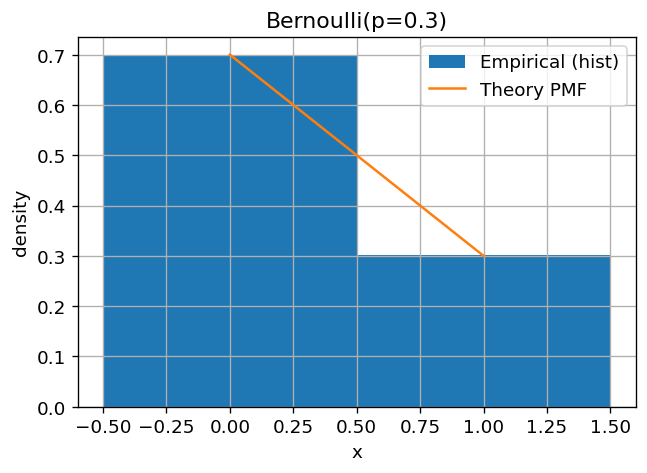

In [21]:
# Bernoulli(p)
N = 50_000
p = 0.3
data = rng.binomial(n=1, p=p, size=N)

# Theoretical PMF points at x = 0, 1
x_th = [0, 1]
y_th = [1 - p, p]

show_hist_with_theory(
    data,
    bins=[-0.5, 0.5, 1.5],
    density=True,
    title=f"Bernoulli(p={p})",
    xlabel="x",
    x_theory=x_th, y_theory=y_th,
    label_hist="Empirical (hist)",
    label_theory="Theory PMF"
)

#### Binomial — מספר הצלחות מתוך $n$ ניסויים  

התפלגות בינומית מתארת את **מספר ההצלחות מתוך $n$ ניסויים בלתי־תלויים**, כאשר בכל ניסוי  
ההסתברות להצלחה היא אותה הסתברות $p$.  

אפשר לחשוב על זה כהרחבה של ברנולי: במקום ניסוי יחיד, אנו מבצעים סדרה של $n$ ניסויים (כמו $n$ הטלות מטבע).  
המשתנה המקרי $X$ הוא **כמה פעמים הצלחנו** מתוך $n$.  

`````{admonition} תכונות חשובות:
:class: tip
- **התוחלת**: $E[X] = np$ — מספר ההצלחות הצפוי מתוך $n$ ניסויים.  
- **השונות**: $Var[X] = np(1-p)$ — מדד הפיזור של מספר ההצלחות סביב התוחלת.  
`````

`````{admonition} דוגמאות שימוש:
:class: tip
- כמה חלקיקים יזוהו מתוך $n$ יריות אם ההסתברות שכל חלקיק ייקלט היא $p$.  
- כמה פוטונים יגיעו לגלאי מתוך סדרה של ניסיונות מדידה.  
- כמה ניסויים מוצלחים יהיו בניסוי פיזיקלי שחוזרים עליו מספר רב של פעמים.  
`````

הבינומי הוא אבן בניין מרכזית בסטטיסטיקה ובסימולציות מונטה־קרלו, כי הוא מאפשר להבין את הפיזור של הצלחות במספר גדול של ניסויים.


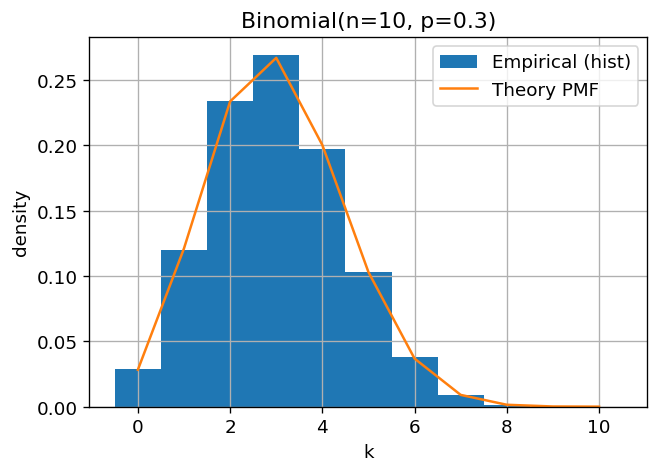

In [22]:
# Binomial(n, p)
N = 50_000
n, p = 10, 0.3
data = rng.binomial(n=n, p=p, size=N)

# Theoretical PMF for k = 0..n
ks = np.arange(0, n + 1)
pmf = np.array([math.comb(n, k) * (p**k) * ((1 - p)**(n - k)) for k in ks])

show_hist_with_theory(
    data,
    bins=np.arange(-0.5, n + 1.5, 1),
    density=True,
    title=f"Binomial(n={n}, p={p})",
    xlabel="k",
    x_theory=ks, y_theory=pmf,
    label_theory="Theory PMF"
)


#### Geometric — מספר ניסיונות עד הצלחה ראשונה  

התפלגות גאומטרית מתארת את **מספר הניסיונות הדרושים עד להצלחה הראשונה**, כאשר בכל ניסיון  
הסיכוי להצלחה הוא $p$ והניסיונות בלתי־תלויים זה בזה.  

במילים אחרות: אנחנו שואלים *"כמה פעמים צריך לנסות עד שבפעם הראשונה נצליח?"*.  
המשתנה המקרי $X$ יכול לקבל ערכים $1, 2, 3, \dots$ — כי ההצלחה הראשונה יכולה להגיע כבר בניסיון הראשון,  
או בהמשך אחרי כמה כישלונות.  

`````{admonition} תכונות חשובות:
:class: tip
- **התוחלת**: $E[X] = \tfrac{1}{p}$ — בממוצע, נצטרך $1/p$ ניסיונות עד הצלחה.  
- **השונות**: $Var[X] = \tfrac{1-p}{p^2}$ — מדד הפיזור של מספר הניסיונות סביב התוחלת.  
`````

`````{admonition} דוגמאות שימוש:
:class: tip
- כמה פוטונים נצטרך לנסות למדוד עד שנקלוט אחד בגלאי בהסתברות $p$ לכל פוטון.  
- כמה ניסויי דעיכה רדיואקטיבית נצטרך עד שנצפה באירוע ראשון.  
- כמה ניסויים במעבדה עד לקבלת תוצאה רצויה (כמו התרחשות מעבר מסוים או תגובה כימית).  
`````

התפלגות זו מדגישה את רעיון ה"ניסיונות החוזרים" עד הצלחה ומופיעה רבות בפיזיקה סטטיסטית ובמודלים של תהליכים מקריים.


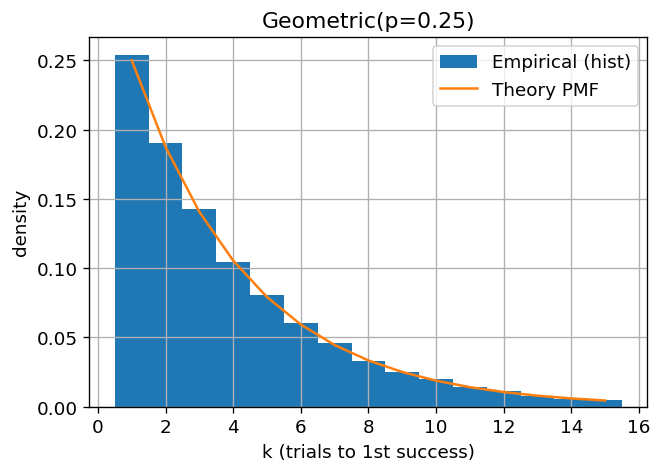

In [23]:
# Geometric(p) — counts trials until first success (1,2,3,...)
N = 50_000
p = 0.25
data = rng.geometric(p, size=N)

# Display up to a reasonable cut for clarity
k_max = 15
ks = np.arange(1, k_max + 1)
pmf = p * (1 - p) ** (ks - 1)

show_hist_with_theory(
    data[data <= k_max],
    bins=np.arange(0.5, k_max + 1.5, 1),
    density=True,
    title=f"Geometric(p={p})",
    xlabel="k (trials to 1st success)",
    x_theory=ks, y_theory=pmf,
    label_theory="Theory PMF"
)


#### Poisson — ספירת אירועים בקצב ממוצע $\lambda$  

התפלגות פואסון מתארת את **מספר האירועים שמתרחשים בפרק זמן נתון או במרחב נתון**,  
כאשר האירועים מתרחשים באופן עצמאי ובקצב ממוצע קבוע $\lambda$.  

במילים אחרות: אם בממוצע מתרחשים $\lambda$ אירועים ביחידת זמן (או נפח/שטח),  
אז המשתנה המקרי $X$ אומר לנו *כמה אירועים התרחשו בפועל* ביחידת זמן מסוימת.  

`````{admonition} תכונות חשובות:
:class: tip
- **התוחלת**: $E[X] = \lambda$.  
- **השונות**: $Var[X] = \lambda$ — כלומר הפיזור שווה גם הוא לממוצע, תכונה ייחודית לפואסון.  
`````

`````{admonition} דוגמאות שימוש:
:class: tip
- מספר התפרקויות רדיואקטיביות שמתרחשות בשנייה במדגם חומר.  
- כמה פוטונים פוגעים בגלאי בזמן קצוב.  
- מספר התנגשות חלקיקים במאיץ בזמן חלון מדידה נתון.  
- ספירה של קרניים קוסמיות או חלקיקים נדירים הנמדדים ביחידות זמן.  
`````

הפואסון מהווה קירוב טבעי להתפלגות בינומית במצבים של מספר ניסויים גדול מאוד ($n \to \infty$)  
עם הסתברות הצלחה קטנה מאוד ($p \to 0$), כך ש־$np = \lambda$ נשאר קבוע.


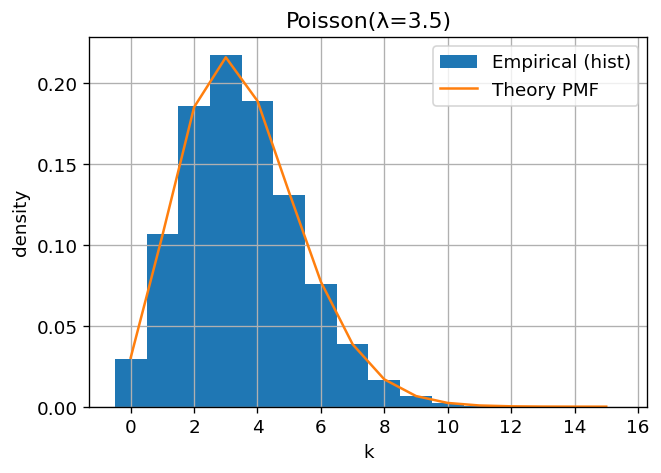

In [24]:
# Poisson(λ)
N = 50_000
lam = 3.5
data = rng.poisson(lam=lam, size=N)

# Theoretical PMF for k = 0..k_max
k_max = 15
ks = np.arange(0, k_max + 1)
pmf = np.exp(-lam) * lam**ks / np.array([math.factorial(k) for k in ks])

show_hist_with_theory(
    data,
    bins=np.arange(-0.5, k_max + 1.5, 1),
    density=True,
    title=f"Poisson(λ={lam})",
    xlabel="k",
    x_theory=ks, y_theory=pmf,
    label_theory="Theory PMF"
)


#### Uniform — אחידה רציפה בטווח $[a,b]$  

התפלגות אחידה רציפה היא אחת הפשוטות ביותר: היא מניחה שלכל ערך בטווח $[a,b]$ יש **הסתברות זהה להתרחש**.  
במילים אחרות, המשתנה המקרי $X$ מתפלג "בצורה שטוחה" — אין ערכים מועדפים יותר מאחרים.  

`````{admonition} פונקציית הצפיפות (PDF):
:class: tip

$$
f(x) = 
\begin{cases}
\frac{1}{b-a}, & a \le x \le b \\
0, & \text{otherwise}
\end{cases}
$$

`````

`````{admonition} תכונות חשובות:
:class: tip
- **התוחלת**: $E[X] = \tfrac{a+b}{2}$ — הערך הממוצע הוא בדיוק האמצע של הטווח.  
- **השונות**: $Var[X] = \tfrac{(b-a)^2}{12}$ — הפיזור תלוי ברוחב הטווח.  
`````

`````{admonition} דוגמאות שימוש:
:class: tip
- מודל פשוט לשגיאת מדידה שאינה תלויה בערך (טעות אחידה בטווח מסוים).  
- בחירה מקרית של נקודה על מקטע.  
- סימולציות מונטה־קרלו שבהן מתחילים מדגימה אחידה ולאחר מכן ממירים להתפלגות אחרת.  
`````

התפלגות זו משמשת כבסיס להרבה מחוללי מספרים אקראיים — לרוב מייצרים מספרים אחידים ב־$[0,1]$,  
ומהם בונים דגימות מכל התפלגות אחרת.


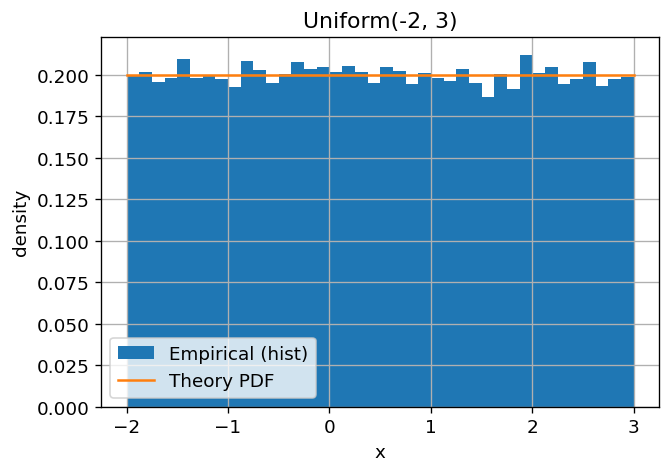

In [25]:
# Uniform(a, b)
N = 50_000
a, b = -2, 3
data = rng.uniform(a, b, size=N)

# Theoretical PDF is constant on [a,b]
xs = np.linspace(a, b, 300)
pdf = np.ones_like(xs) / (b - a)

show_hist_with_theory(
    data,
    bins=40,
    density=True,
    title=f"Uniform({a}, {b})",
    xlabel="x",
    x_theory=xs, y_theory=pdf,
    label_theory="Theory PDF"
)


#### Normal — נורמלית $ \mathcal{N}(\mu,\sigma^2) $  

התפלגות נורמלית (או "גאוסיאנית") היא אחת ההתפלגויות החשובות והנפוצות ביותר במדע.  
היא מתוארת ע"י **פעמון סימטרי** סביב התוחלת $\mu$, עם פרמטר סטיית תקן $\sigma$ שמגדיר את רוחב הפעמון.  

`````{admonition} פונקציית הצפיפות (PDF):
:class: tip

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\!\left( -\frac{(x-\mu)^2}{2\sigma^2} \right)
$$

`````

`````{admonition} תכונות חשובות:
:class: tip
- **התוחלת**: $E[X] = \mu$ — מרכז הפעמון.  
- **השונות**: $Var[X] = \sigma^2$ — קובעת את הפיזור סביב התוחלת.  
- **התפלגות סימטרית**: חציון ושכיח שווים גם הם ל־$\mu$.  
`````

`````{admonition} דוגמאות שימוש:
:class: tip
- רעש מדידה — טעויות מקריות נוטות להתפלג נורמלית סביב הערך האמיתי.  
- תופעות טבע רבות מתכנסות לנורמלית בזכות **משפט הגבול המרכזי** (חיבור של הרבה משתנים אקראיים בלתי־תלויים).  
- מהירות חלקיקים בגז (מודל מקסוול־בולצמן) מתוארת בנגזרת של התפלגות נורמלית.  
`````

הנורמלית היא אבן יסוד בסטטיסטיקה ובפיזיקה סטטיסטית, ומשמשת בסיס להסקת מסקנות ולבניית מודלים.


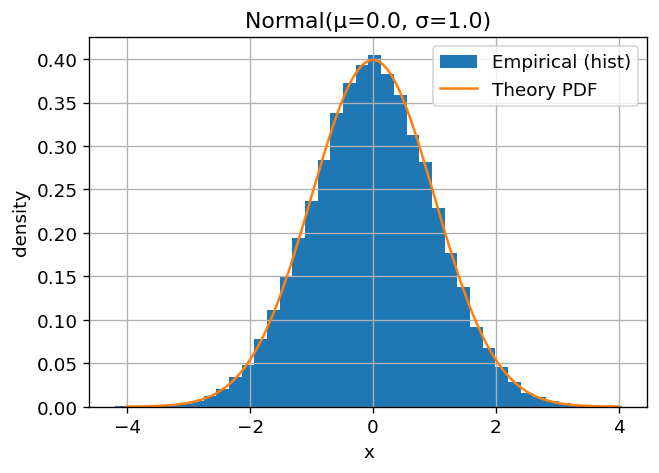

In [26]:
# Normal(μ, σ)
N = 50_000
mu, sigma = 0.0, 1.0
data = rng.normal(mu, sigma, size=N)

# Theoretical PDF of Normal
xs = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 400)
pdf = (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((xs - mu) / sigma) ** 2)

show_hist_with_theory(
    data,
    bins=40,
    density=True,
    title=f"Normal(μ={mu}, σ={sigma})",
    xlabel="x",
    x_theory=xs, y_theory=pdf,
    label_theory="Theory PDF"
)


#### Exponential — זמן בין אירועים בקצב $\lambda$  

התפלגות אקספוננציאלית מתארת את **הזמן שחולף בין שני אירועים עוקבים** בתהליך פואסוני, כלומר תהליך שבו אירועים מתרחשים בקצב ממוצע קבוע $\lambda$ ובאופן בלתי־תלוי.  

`````{admonition} פונקציית הצפיפות (PDF):
:class: tip

$$
f(x) = 
\begin{cases}
\lambda e^{-\lambda x}, & x \ge 0 \\
0, & x < 0
\end{cases}
$$

`````

`````{admonition} תכונות חשובות:
:class: tip
- **התוחלת**: $E[X] = \tfrac{1}{\lambda}$ — הזמן הממוצע בין אירועים.  
- **השונות**: $Var[X] = \tfrac{1}{\lambda^2}$ — הפיזור סביב התוחלת.  
- **תכונת "חוסר הזיכרון"**: ההסתברות להתרחשות אירוע אינה תלויה בזמן שעבר מאז האירוע הקודם.  
`````

`````{admonition} דוגמאות שימוש:
:class: tip
- זמן חיים של אטום מעורר לפני דעיכה רדיואקטיבית.  
- זמן המתנה עד שחלקיק יפגע בגלאי.  
- זמני כשל (failure times) של רכיבים אלקטרוניים במודל פשוט.  
- זמני המתנה במודלים של תורים (Queueing theory).  
`````

האקספוננציאלית היא מרכיב בסיסי במודלים של תהליכים מקריים מתמשכים ובפיזיקה סטטיסטית, והיא משמשת גם כבסיס לבניית התפלגויות אחרות (למשל גאמא).


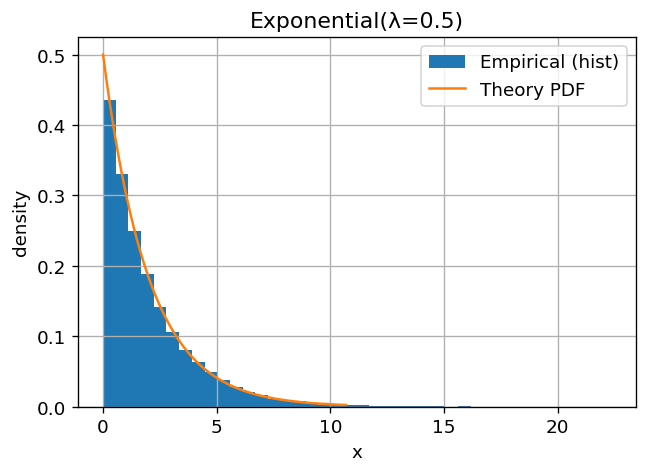

In [27]:
# Exponential(λ)
N = 50_000
lam = 0.5
data = rng.exponential(scale=1 / lam, size=N)  # NumPy uses 'scale' = 1/λ

# Plot theoretical PDF on a practical x-range
xmax = np.quantile(data, 0.995)
xs = np.linspace(0, xmax, 400)
pdf = lam * np.exp(-lam * xs)

show_hist_with_theory(
    data,
    bins=40,
    density=True,
    title=f"Exponential(λ={lam})",
    xlabel="x",
    x_theory=xs, y_theory=pdf,
    label_theory="Theory PDF"
)


In [28]:
import json
from jupyterquiz import display_quiz

quiz_numpy_dists = \
'''
[{
  "question": "איזו פקודה ב-NumPy מתאימה לדגימה מניסוי ברנולי עם הסתברות הצלחה p=0.3?",
  "type": "many_choice",
  "answers": [
    {
      "answer": "rng.binomial(n=1, p=0.3, size=1000)",
      "correct": true,
      "feedback": "נכון! דגימת ברנולי נעשית כבינומי עם n=1"
    },
    {
      "answer": "rng.bernoulli(p=0.3, size=1000)",
      "correct": false,
      "feedback": "לא נכון — ב-NumPy אין פונקציה bernoulli נפרדת, אלא binomial עם n=1"
    },
    {
      "answer": "rng.normal(0.3, 1, size=1000)",
      "correct": false,
      "feedback": "לא נכון — זה מגריל התפלגות נורמלית, לא ברנולי"
    },
    {
      "answer": "rng.poisson(0.3, size=1000)",
      "correct": false,
      "feedback": "לא נכון — זו התפלגות פואסון"
    }
  ]
},
{
  "question": "איך נדגום מספר הצלחות מתוך 20 ניסיונות בהסתברות הצלחה p=0.1 בעזרת NumPy?",
  "type": "many_choice",
  "answers": [
    {
      "answer": "rng.binomial(n=20, p=0.1, size=5000)",
      "correct": true,
      "feedback": "נכון! binomial עם n=20 מתאר בדיוק את המקרה הזה"
    },
    {
      "answer": "rng.geometric(p=0.1, size=5000)",
      "correct": false,
      "feedback": "לא נכון — geometric מחזירה את מספר הניסיונות עד הצלחה ראשונה"
    },
    {
      "answer": "rng.poisson(20*0.1, size=5000)",
      "correct": false,
      "feedback": "זה יכול לשמש כקירוב במקרים מסוימים, אך ההגדרה המדויקת היא binomial"
    },
    {
      "answer": "rng.uniform(0,20, size=5000)",
      "correct": false,
      "feedback": "לא נכון — uniform מגרילה ערכים אחידים, לא הצלחות מתוך ניסיונות"
    }
  ]
},
{
  "question": "נרצה לדגם זמני המתנה עד לאירוע בתהליך בקצב λ=2. איזו פקודה ב-NumPy מתאימה?",
  "type": "many_choice",
  "answers": [
    {
      "answer": "rng.exponential(scale=1/2, size=10000)",
      "correct": true,
      "feedback": "נכון! scale = 1/λ בדגימה אקספוננציאלית ב-NumPy"
    },
    {
      "answer": "rng.poisson(2, size=10000)",
      "correct": false,
      "feedback": "לא נכון — זו דוגמת פואסון שמתארת ספירת אירועים, לא זמן המתנה"
    },
    {
      "answer": "rng.normal(2,1,size=10000)",
      "correct": false,
      "feedback": "לא נכון — נורמלית אינה מתארת זמני המתנה"
    },
    {
      "answer": "rng.binomial(n=2,p=0.5,size=10000)",
      "correct": false,
      "feedback": "לא נכון — זו התפלגות בינומית"
    }
  ]
}]
'''
myquiz = json.loads(quiz_numpy_dists)
display_quiz(myquiz)


<IPython.core.display.Javascript object>